In [23]:
!git clone https://github.com/jbirky/vplanet_inference

fatal: destination path 'vplanet_inference' already exists and is not an empty directory.


In [6]:
!git clone https://github.com/VirtualPlanetaryLaboratory/vplanet.git

import subprocess
subprocess.call(["python setup.py develop"], cwd="vplanet", shell=True)

Cloning into 'vplanet'...
remote: Enumerating objects: 37189, done.
remote: Counting objects: 100% (12551/12551), done.
remote: Compressing objects: 100% (2198/2198), done.
remote: Total 37189 (delta 10366), reused 12353 (delta 10199), pack-reused 24638
Receiving objects: 100% (37189/37189), 163.50 MiB | 22.83 MiB/s, done.
Resolving deltas: 100% (27232/27232), done.


In [46]:
import sys
sys.path.append("vplanet")
sys.path.append("vplanet_inference")
import vplanet
import vplanet_inference as vpi

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from matplotlib import rc
rc('xtick', labelsize=16)
rc('ytick', labelsize=16)
rc('axes', labelsize=16)
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
rc('text', usetex=False)
import os

In [56]:
inpath = "vplanet_inference/infiles/stellar/"
outpath = "output/"

inparams = {"star.dMass": u.Msun,
            "vpl.dStopTime": u.Gyr}

outparams = {"final.star.Radius": u.Rsun,
             "final.star.Luminosity": u.Lsun}

# Initialize the vplanet model
vpm = vpi.VplanetModel(inparams=inparams,
                       outparams=outparams,
                       inpath=inpath,
                       outpath=outpath,
                       timesteps=1e6*u.yr,
                       time_init=5e6*u.yr)

In [57]:
# Run the vplanet model
theta = np.array([1.0, 2.5])
evol = vpm.run_model(theta, remove=False, outsubpath="demo_star")


Input:
-----------------
star.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)
vpl.dStopTime : 2.5 [Gyr] (user)   --->   7.8894e+16 [s] (vpl file)

Created file output//demo_star/vpl.in
Created file output//demo_star/star.in


Executed model output//demo_star/vpl.in 9.700 s

Output:
-----------------
final.star.Luminosity : 0.8341883490073144 [solLum]
final.star.Radius : 0.9542404772171913 [solRad]



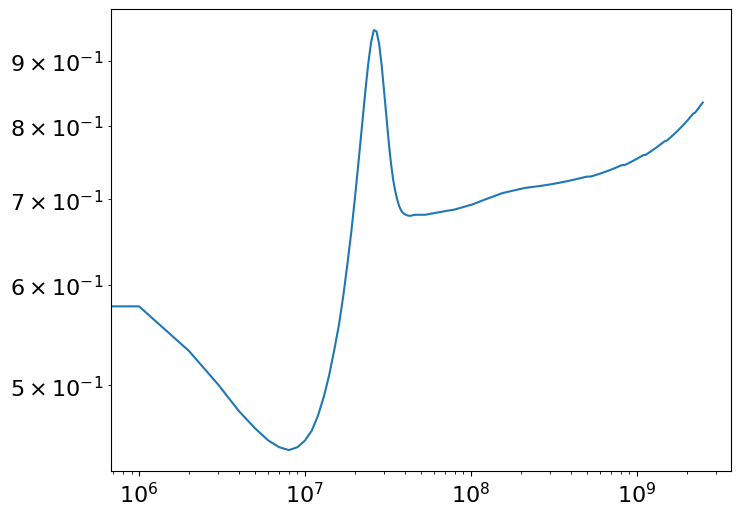

In [58]:
plt.figure(figsize=[8,6])
plt.plot(evol["Time"], evol["final.star.Luminosity"])
plt.xscale("log")
plt.yscale("log")
plt.show()

In [60]:
log = vplanet.get_output("output/demo_star")